In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Tables

In [2]:
file_dir = "len_a=1/intercept=-1/"

In [3]:
file_dir + "3"

'len_a=1/intercept=-1/3'

In [57]:
df110 = pd.read_csv(file_dir + "250 f1 d0.csv")
df111 = pd.read_csv(file_dir + "250 f1 d1.csv")
df210 = pd.read_csv(file_dir + "500 f1 d0.csv")
df211 = pd.read_csv(file_dir + "500 f1 d1.csv")
df310 = pd.read_csv(file_dir + "1000 f1 d0.csv")
df311 = pd.read_csv(file_dir + "1000 f1 d1.csv")

In [4]:
df120 = pd.read_csv(file_dir + "250 f2 d0.csv")
df121 = pd.read_csv(file_dir + "250 f2 d1.csv")
df220 = pd.read_csv(file_dir + "500 f2 d0.csv")
df221 = pd.read_csv(file_dir + "500 f2 d1.csv")
df320 = pd.read_csv(file_dir + "1000 f2 d0.csv")
df321 = pd.read_csv(file_dir + "1000 f2 d1.csv")

In [58]:
α = [1, -2]

gamma = [[0.5, 0.0], [0.5, 1.0], [0.0, 0.5], [1.0, 0.5], [0.5, 0.5]]
gamma_ = ["[0.5, 0.0]", "[0.5, 1.0]", "[0.0, 0.5]", "[1.0, 0.5]", "[0.5, 0.5]"]

In [79]:
df = df211.round(4)
df[["γ1", "γ2"]]

,γ1,γ2
0,0.2663,0.5414
1,0.0035,0.2709
2,0.2701,-0.0033
3,0.5308,0.2732
4,0.2645,0.2687


In [80]:
df = df.iloc[[2,0,1,3,4]]

In [81]:
df

,α1,α2,var_α1,var_α2,γ1,γ2,var_γ1,var_γ2,θ1,θ2,var_θ1,var_θ2,β1,β2,var_β1,var_β2
2,0.4472,-0.8942,0.0004,0.0001,0.2701,-0.0033,0.0033,0.0016,2.0111,1.0078,0.0086,0.0085,-0.0397,-0.5085,0.1278,0.0310
0,0.4470,-0.8943,0.0003,0.0001,0.2663,0.5414,0.0030,0.0029,2.0113,1.0059,0.0065,0.0043,1.4137,-2.3083,0.2246,0.3131
1,0.4495,-0.8931,0.0003,0.0001,0.0035,0.2709,0.0032,0.0018,2.0038,1.0099,0.0063,0.0061,1.1146,-1.2955,0.1755,0.0960
3,0.4487,-0.8934,0.0004,0.0001,0.5308,0.2732,0.0045,0.0020,2.0144,1.0132,0.0080,0.0069,0.1217,-1.3983,0.1238,0.1148
4,0.4493,-0.8932,0.0003,0.0001,0.2645,0.2687,0.0038,0.0020,2.0041,1.0094,0.0076,0.0058,0.6390,-1.3982,0.0849,0.1195


In [82]:
table = pd.DataFrame()

table["a2"] =  (df["α2"] / df["α1"]).round(4)

weight = 1 / df["α1"]

# weight ** 2

table["var_a2"] = df["var_α2"] * weight**2

table["g"] = gamma_

table[["g1", "g2"]] = df[["γ1", "γ2"]] * 2

table["var_g1"] = df["var_γ1"] * 4
table["var_g2"] = df["var_γ2"] * 4

# table

g2 = []
for m, v in zip(table["g2"], table["var_g2"]):
    g2.append("{mean:0<6}({var:0<6})".format(mean = m, var = v))
# print(g2)

g1 = []
for m, v in zip(table["g1"], table["var_g1"]):
    g1.append("{mean:0<6}({var:0<6})".format(mean = m, var = v))
# print(g1)

a2 = []
for m, v in zip(table["a2"], table["var_g2"]):
    a2.append("{mean:0<6}({var:0<6})".format(mean = m, var = v))
# print(a2)

table["gamma1"] = g1
table["gamma2"] = g2
table["alpha2"] = a2

table

,a2,var_a2,g,g1,g2,var_g1,var_g2,gamma1,gamma2,alpha2
2,-1.9996,0.000500,"[0.5, 0.0]",0.5402,-0.0066,0.0132,0.0064,0.5402(0.0132),-0.0066(0.0064),-1.9996(0.0064)
0,-2.0007,0.000500,"[0.5, 1.0]",0.5326,1.0828,0.0120,0.0116,0.5326(0.0120),1.0828(0.0116),-2.0007(0.0116)
1,-1.9869,0.000495,"[0.0, 0.5]",0.0070,0.5418,0.0128,0.0072,0.0070(0.0128),0.5418(0.0072),-1.9869(0.0072)
3,-1.9911,0.000497,"[1.0, 0.5]",1.0616,0.5464,0.0180,0.0080,1.0616(0.0180),0.5464(0.0080),-1.9911(0.0080)
4,-1.9880,0.000495,"[0.5, 0.5]",0.5290,0.5374,0.0152,0.0080,0.5290(0.0152),0.5374(0.0080),-1.988(0.0080)


In [83]:
t211 = table[["g", "alpha2", "gamma1", "gamma2"]]

In [84]:
t211.to_csv("n500f1d1.csv")

# Plots

NameError: name 'Alpha' is not defined

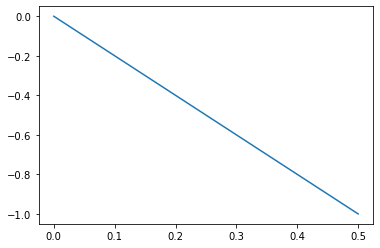

In [133]:
f = lambda x: -2.0*x
x_ = np.linspace(0, α[0]/2, 10)
plt.plot(x_, f(x_))
for k in range(0, 4):
    alphak = Alpha.loc[k]
    k = alphak[1]/alphak[0]
    fk = lambda x: k*x
    x_ = np.linspace(0, alphak[0], 10)
    plt.plot(x_, fk(x_), linestyle = "--")

<ipython-input-134-a0e2e256ed6c>:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(spec[0,1])
<ipython-input-134-a0e2e256ed6c>:59: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(spec[1,0])
<ipython-input-134-a0e2e256ed6c>:80: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instanc

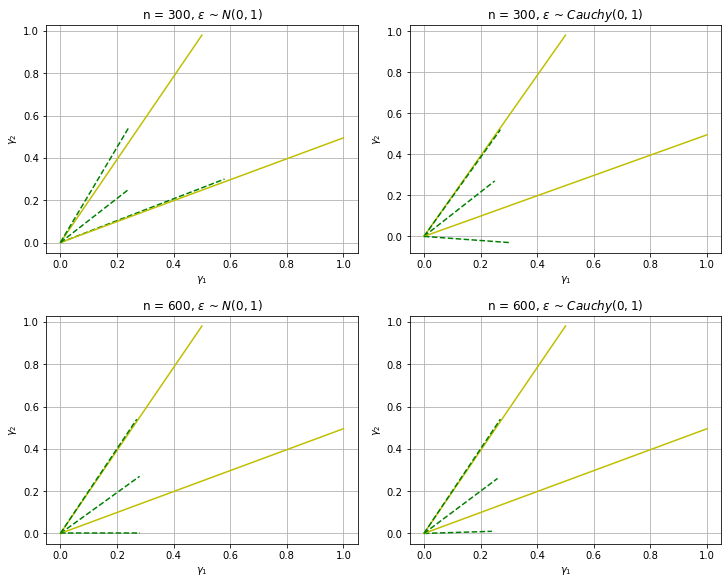

In [134]:
fig = plt.figure(figsize = [10,8], constrained_layout=True)
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax0 = fig.add_subplot(spec[0,0])
ax0.grid()

ax1 = fig.add_subplot(spec[0,1])
ax1.grid()

ax2 = fig.add_subplot(spec[1,0])
ax2.grid()

ax3 = fig.add_subplot(spec[1,1])
ax3.grid()

Gamma = df120[["γ1", "γ2"]].round(2)
Gamma
ax0.set_title(r"n = 300, $\epsilon$ ~ $N(0, 1)$")
ax0.set_xlabel(r"$\gamma_1$")
ax0.set_ylabel(r"$\gamma_2$")
# ax0.text(0.5,3.5, r"$\gamma$ = $(1, 4)^T$")
# ax0.text(0.12,2.2, r"$\hat \gamma$ = $({}, {})^T$".format(Gamma.loc[4][0],Gamma.loc[4][1]))
# ax0.text(3.0,0.8, r"$\gamma$ = $(4, 1)^T$")
# ax0.text(2.0,0.4, r"$\hat \gamma$ = $({}, {})^T$".format(Gamma.loc[7][0],Gamma.loc[7][1]))
for i in range(3):
    k = gamma[i + 1][1]/(gamma[i + 1][0] + 0.01)
    fk = lambda x: k*x
    x = np.linspace(0, gamma[i + 1][0], 10)
    ax0.plot(x, fk(x), c = "y")
    gammai = Gamma.loc[i + 1]
    k_ = gammai[1]/gammai[0]
    fk_ = lambda x: k_*x
    x_ = np.linspace(0, gammai[0], 10)
    ax0.plot(x_, fk_(x_), linestyle = "--", c = "g")

Gamma = df121[["γ1", "γ2"]].round(2)
Gamma
ax1.set_title(r"n = 300, $\epsilon$ ~ $Cauchy(0, 1)$")
ax1 = fig.add_subplot(spec[0,1])
ax1.set_xlabel(r"$\gamma_1$")
ax1.set_ylabel(r"$\gamma_2$")
# ax1.text(0.5,3.5, r"$\gamma$ = $(1, 4)^T$")
# ax1.text(0.12,2.2, r"$\hat \gamma$ = $({}, {})^T$".format(Gamma.loc[4][0],Gamma.loc[4][1]))
# ax1.text(3.0,0.8, r"$\gamma$ = $(4, 1)^T$")
# ax1.text(2.0,0.4, r"$\hat \gamma$ = $({}, {})^T$".format(Gamma.loc[7][0],Gamma.loc[7][1]))
for i in range(3):
    k = gamma[i + 1][1]/(gamma[i + 1][0] + 0.01)
    fk = lambda x: k*x
    x = np.linspace(0, gamma[i + 1][0], 10)
    ax1.plot(x, fk(x), c = "y")
    gammai = Gamma.loc[i + 1]
    k_ = gammai[1]/gammai[0]
    fk_ = lambda x: k_*x
    x_ = np.linspace(0, gammai[0], 10)
    ax1.plot(x_, fk_(x_), linestyle = "--", c = "g")

Gamma = df220[["γ1", "γ2"]].round(2)
Gamma
ax2.set_title(r"n = 600, $\epsilon$ ~ $N(0, 1)$")
ax2 = fig.add_subplot(spec[1,0])
ax2.set_xlabel(r"$\gamma_1$")
ax2.set_ylabel(r"$\gamma_2$")
# ax2.text(0.5,3.5, r"$\gamma$ = $(1, 4)^T$")
# ax2.text(0.12,2.2, r"$\hat \gamma$ = $({}, {})^T$".format(Gamma.loc[4][0],Gamma.loc[4][1]))
# ax2.text(3.0,0.8, r"$\gamma$ = $(4, 1)^T$")
# ax2.text(2.0,0.4, r"$\hat \gamma$ = $({}, {})^T$".format(Gamma.loc[7][0],Gamma.loc[7][1]))
for i in range(3):
    k = gamma[i + 1][1]/(gamma[i + 1][0] + 0.01)
    fk = lambda x: k*x
    x = np.linspace(0, gamma[i + 1][0], 10)
    ax2.plot(x, fk(x), c = "y")
    gammai = Gamma.loc[i + 1]
    k_ = gammai[1]/gammai[0]
    fk_ = lambda x: k_*x
    x_ = np.linspace(0, gammai[0], 10)
    ax2.plot(x_, fk_(x_), linestyle = "--", c = "g")

Gamma = df221[["γ1", "γ2"]].round(2)
Gamma
ax3.set_title(r"n = 600, $\epsilon$ ~ $Cauchy(0, 1)$")
ax3 = fig.add_subplot(spec[1,1])
ax3.set_xlabel(r"$\gamma_1$")
ax3.set_ylabel(r"$\gamma_2$")
# ax3.text(0.5,3.5, r"$\gamma$ = $(1, 4)^T$")
# ax3.text(0.12,2.2, r"$\hat \gamma$ = $({}, {})^T$".format(Gamma.loc[4][0],Gamma.loc[4][1]))
# ax3.text(3.0,0.8, r"$\gamma$ = $(4, 1)^T$")
# ax3.text(2.0,0.4, r"$\hat \gamma$ = $({}, {})^T$".format(Gamma.loc[7][0],Gamma.loc[7][1]))
for i in range(3):
    k = gamma[i + 1][1]/(gamma[i + 1][0] + 0.01)
    fk = lambda x: k*x
    x = np.linspace(0, gamma[i + 1][0], 10)
    ax3.plot(x, fk(x), c = "y")
    gammai = Gamma.loc[i + 1]
    k_ = gammai[1]/gammai[0]
    fk_ = lambda x: k_*x
    x_ = np.linspace(0, gammai[0], 10)
    ax3.plot(x_, fk_(x_), linestyle = "--", c = "g")

plt.savefig("model_2.png", format='png', bbox_inches='tight', dpi=300, transparent=True)

In [287]:
fig.savefig("model_2.png")

In [102]:
for k in range(7):
    γk = gamma[k + 1]
    gammak = Gamma.loc[k + 1]
    angle = np.sum(gammak * γk) / (np.linalg.norm(γk)* np.linalg.norm(gammak))
    print("",angle)

 0.9994215685377588
 0.9999941336742791
 0.99995613933659
 0.9997189287243002
 0.999969069416688
 0.9999975360914906
 0.9997783344796746


In [91]:
gamma

[[0, 0],
 [1.0, 0.001],
 [1.0, 1.0],
 [1.0, 2.0],
 [1.0, 4.0],
 [0.001, 1.0],
 [2.0, 1.0],
 [4.0, 1.0]]